Load File into a DataFrame
FileName: IterationsForTree.csv 

In [7]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

df = pandas.read_csv("Iterations.csv")

print(df)

     TIREDNESSINDEX CURRENTACTION PREVIOUSACTION NEXTSCHEDULE RESULT
0                 0         CLASS          CLASS        CLASS  CLASS
1                 0         CLASS          CLASS          EAT    EAT
2                 0         CLASS          CLASS         NONE  STUDY
3                 0         CLASS          CLASS         REST  STUDY
4                 0         CLASS          CLASS        STUDY  STUDY
..              ...           ...            ...          ...    ...
620               4         STUDY          STUDY        CLASS   REST
621               4         STUDY          STUDY          EAT    EAT
622               4         STUDY          STUDY         NONE  STUDY
623               4         STUDY          STUDY         REST   REST
624               4         STUDY          STUDY        STUDY  STUDY

[625 rows x 5 columns]


In [8]:
translations = {"CLASS" : 0, "EAT" : 1, "NONE" : 2, "REST" : 3, "STUDY": 4}

df["CURRENTACTION"] = df["CURRENTACTION"].map(translations)
df["PREVIOUSACTION"] = df["PREVIOUSACTION"].map(translations) 
df["NEXTSCHEDULE"] = df["NEXTSCHEDULE"].map(translations) 
df["RESULT"] = df["RESULT"].map(translations) 

print(df)

     TIREDNESSINDEX  CURRENTACTION  PREVIOUSACTION  NEXTSCHEDULE  RESULT
0                 0              0               0             0       0
1                 0              0               0             1       1
2                 0              0               0             2       4
3                 0              0               0             3       4
4                 0              0               0             4       4
..              ...            ...             ...           ...     ...
620               4              4               4             0       3
621               4              4               4             1       1
622               4              4               4             2       4
623               4              4               4             3       3
624               4              4               4             4       4

[625 rows x 5 columns]


In [10]:
features = ["CURRENTACTION","PREVIOUSACTION","NEXTSCHEDULE","TIREDNESSINDEX"]

X = df[features]
y = df["RESULT"]

print("Features:")
print(X)

print("End Results")
print(y)

Features:
     CURRENTACTION  PREVIOUSACTION  NEXTSCHEDULE  TIREDNESSINDEX
0                0               0             0               0
1                0               0             1               0
2                0               0             2               0
3                0               0             3               0
4                0               0             4               0
..             ...             ...           ...             ...
620              4               4             0               4
621              4               4             1               4
622              4               4             2               4
623              4               4             3               4
624              4               4             4               4

[625 rows x 4 columns]
End Results
0      0
1      1
2      4
3      4
4      4
      ..
620    3
621    1
622    4
623    3
624    4
Name: RESULT, Length: 625, dtype: int64


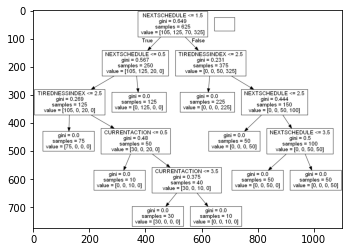

In [11]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X,y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('ThesisDecisionTreeNew.png')

img=pltimg.imread('ThesisDecisionTreeNew.png')
imgplot = plt.imshow(img)
plt.show()